In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pl
from plot_functions import *
from importlib import reload  
import sys
sys.path.append("/home/mlparker/programs/python_modules/plotting_functions/")
from step_plots import *
from matplotlib.ticker import *


C1='#D81B60'
C2='#1E88E5'
C3='#FFC107'
C4='#135247'
colors=[C1,C2,C3,C4]

In [2]:
def mutoi(mu):
    i=  np.arccos(mu)/2/np.pi*360
    return i

In [3]:
refdatafile="simulated_spectra_2/xmm_hybrid/fits_relxill_3to10.dat"
refdata=pd.read_csv(refdatafile)

refdata["i"]=mutoi(refdata["mu"])
refdata["delta_a"]=refdata["fit_a"]-refdata["a"]
refdata["delta_i"]=refdata["fit_i"]-refdata["i"]
# refdata["delta_h"]=refdata["fit_h"]-refdata["h"]
refdata["delta_A"]=refdata["fit_Afe"]-refdata["Afe"]
refdata['redchi']=refdata['chi2']/refdata['dof']

clean_refdata=refdata[refdata['redchi']<1.1]
print('Clean reflection fits:',clean_refdata.shape[0])



# Load DW data
dwdatafile="simulated_spectra_2/xmm_hybrid/fits_dw_3to10.dat"
dwdata=pd.read_csv(dwdatafile)

dwdata["i"]=mutoi(dwdata["mu"])
dwdata["fit_i"]=mutoi(dwdata["fit_mu"])
dwdata["delta_mdot"]=dwdata["fit_mdot"]-dwdata["mdot"]
dwdata["delta_fv"]=dwdata["fit_fv"]-dwdata["fv"]
dwdata["delta_lx"]=dwdata["fit_lx"]-dwdata["lx"]
dwdata['redchi']=dwdata['chi2']/dwdata['dof']

clean_dwdata=dwdata[dwdata['redchi']<1.1]
print('Clean disk wind fits:',clean_dwdata.shape[0])


Clean reflection fits: 344
Clean disk wind fits: 224


In [4]:
merged_data=pd.merge(clean_refdata,clean_dwdata,\
                     on=['filename','a','R','Afe','mdot','fv','lx','gamma','mu'])
print(merged_data.columns)
print(merged_data.shape[0])

Index(['filename', 'a', 'R', 'Afe', 'mdot', 'fv', 'lx', 'gamma', 'mu', 'fit_a',
       'fit_h', 'fit_Afe', 'fit_gamma_x', 'fit_i_x', 'chi2_x', 'dof_x', 'i_x',
       'delta_a', 'delta_i', 'delta_A', 'redchi_x', 'fit_mdot', 'fit_fv',
       'fit_lx', 'fit_mu', 'fit_gamma_y', 'chi2_y', 'dof_y', 'i_y', 'fit_i_y',
       'delta_mdot', 'delta_fv', 'delta_lx', 'redchi_y'],
      dtype='object')
109


In [5]:
testfiles=merged_data.sample(8)

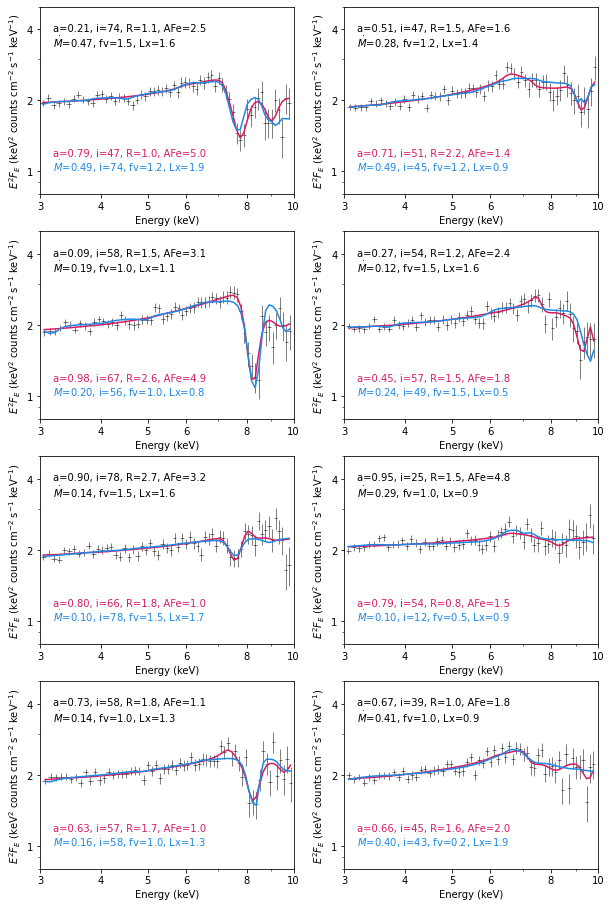

In [6]:
fig=pl.figure(figsize=(10,20),facecolor='w')
escale=2
fscale=1000

for j,fname in enumerate(testfiles["filename"]):
    ax=pl.subplot(520+j+1)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(3,10)
    ax.set_ylim(0.8,5)
#     ax.set_ylim(0.2,3)
    
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_formatter(ScalarFormatter())
    ax.xaxis.set_major_locator(FixedLocator([3,4,5,6,8,10]))
    ax.tick_params(which='minor',labelbottom=False)
    ax.set_xlabel('Energy (keV)')
    
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(ScalarFormatter())
    ax.yaxis.set_major_locator(FixedLocator([1,2,4]))
    ax.tick_params(which='minor',labelleft=False)
    ax.set_ylabel(r"$E^2 F_E$ (keV$^2$ counts cm$^{-2}$ s$^{-1}$ keV$^{-1}$)")
    
    i=fname.split('_')[1]
    
    ref_spec=pd.read_csv('simulated_spectra_2/xmm_hybrid/spectrum_%s.csv' % str(i))
    dw_spec=pd.read_csv('simulated_spectra_2/xmm_hybrid/spectrum_%s_dw.csv' % str(i))
    
    pl.plot(ref_spec['x'],ref_spec['model']*fscale*ref_spec['x']**escale,color=C1)
    
    
    
    a=(float((testfiles.loc[testfiles['filename']==fname]['fit_a'])))
    R=(float((testfiles.loc[testfiles['filename']==fname]['fit_h'])))
    AFe=(float((testfiles.loc[testfiles['filename']==fname]['fit_Afe'])))
    inc=(float((testfiles.loc[testfiles['filename']==fname]['fit_i_x'])))
    ref_pars=r'a=%s, i=%s, R=%s, AFe=%s' % (str(a)[:4], str(inc)[:2],str(R)[:3],str(AFe)[:3]) 
    ax.text(0.05,0.2,ref_pars,transform=ax.transAxes,color=C1)
    
    a=(float((testfiles.loc[testfiles['filename']==fname]['a'])))
    R=(float((testfiles.loc[testfiles['filename']==fname]['R'])))
    AFe=(float((testfiles.loc[testfiles['filename']==fname]['Afe'])))
    inc=(float((testfiles.loc[testfiles['filename']==fname]['i_x'])))
    ref_pars=r'a=%s, i=%s, R=%s, AFe=%s' % (str(a)[:4], str(inc)[:2],str(R)[:3],str(AFe)[:3]) 
    ax.text(0.05,0.87,ref_pars,transform=ax.transAxes,color='k')
    
    pl.plot(dw_spec['x'],dw_spec['model']*fscale*dw_spec['x']**escale,color=C2)
    
    
    mdot=(float((testfiles.loc[testfiles['filename']==fname]['fit_mdot'])))
    fv=(float((testfiles.loc[testfiles['filename']==fname]['fit_fv'])))
    Lx=(float((testfiles.loc[testfiles['filename']==fname]['fit_lx'])))
    inc=(float((testfiles.loc[testfiles['filename']==fname]['fit_i_y'])))
    dw_pars=r'$\dot{M}$=%s, i=%s, fv=%s, Lx=%s' % (str(mdot)[:4], str(inc)[:2],str(fv)[:3],str(Lx)[:3])
    ax.text(0.05,0.12,dw_pars,transform=ax.transAxes,color=C2)
    # calc chi2s:
#     ref_chi2=np.sum((ref_spec["y"]-ref_spec["model"])**2/ref_spec['yerr']**2)
#     dw_chi2=np.sum((dw_spec["y"]-dw_spec["model"])**2/dw_spec['yerr']**2)
#     print(ref_chi2,dw_chi2)


    mdot=(float((testfiles.loc[testfiles['filename']==fname]['mdot'])))
    fv=(float((testfiles.loc[testfiles['filename']==fname]['fv'])))
    Lx=(float((testfiles.loc[testfiles['filename']==fname]['lx'])))
    dw_pars=r'$\dot{M}$=%s, fv=%s, Lx=%s' % (str(mdot)[:4], str(fv)[:3],str(Lx)[:3])
    ax.text(0.05,0.78,dw_pars,transform=ax.transAxes,color='k')
    
    
    pl.errorbar(ref_spec['x'],\
                ref_spec['y']*fscale*ref_spec['x']**escale,\
                ref_spec['yerr']*fscale*ref_spec['x']**escale,\
                ref_spec['xerr'],\
                ls='none',color='k',lw=1,alpha=0.5)
    
    
pl.savefig('figures/spectra/modelcomparison_spectra.pdf',bbox_inches='tight')
    

In [7]:
refdatafile="simulated_spectra_2/athena_hybrid/fits_relxill_3to10.dat"
refdata=pd.read_csv(refdatafile)

refdata["i"]=mutoi(refdata["mu"])
refdata["delta_a"]=refdata["fit_a"]-refdata["a"]
refdata["delta_i"]=refdata["fit_i"]-refdata["i"]
# refdata["delta_h"]=refdata["fit_h"]-refdata["h"]
refdata["delta_A"]=refdata["fit_Afe"]-refdata["Afe"]
refdata['redchi']=refdata['chi2']/refdata['dof']

clean_refdata=refdata[refdata['redchi']<1.1]
print('Clean reflection fits:',clean_refdata.shape[0])



# Load DW data
dwdatafile="simulated_spectra_2/athena_hybrid/fits_dw_3to10.dat"
dwdata=pd.read_csv(dwdatafile)

dwdata["i"]=mutoi(dwdata["mu"])
dwdata["fit_i"]=mutoi(dwdata["fit_mu"])
dwdata["delta_mdot"]=dwdata["fit_mdot"]-dwdata["mdot"]
dwdata["delta_fv"]=dwdata["fit_fv"]-dwdata["fv"]
dwdata["delta_lx"]=dwdata["fit_lx"]-dwdata["lx"]
dwdata['redchi']=dwdata['chi2']/dwdata['dof']

clean_dwdata=dwdata[dwdata['redchi']<1.1]
print('Clean disk wind fits:',clean_dwdata.shape[0])

Clean reflection fits: 662
Clean disk wind fits: 796


In [8]:
merged_data=pd.merge(clean_refdata,clean_dwdata,\
                     on=['filename','a','R','Afe','mdot','fv','lx','gamma','mu'])
print(merged_data.columns)
print(merged_data.shape[0])

Index(['filename', 'a', 'R', 'Afe', 'mdot', 'fv', 'lx', 'gamma', 'mu', 'fit_a',
       'fit_h', 'fit_Afe', 'fit_gamma_x', 'fit_i_x', 'chi2_x', 'dof_x', 'i_x',
       'delta_a', 'delta_i', 'delta_A', 'redchi_x', 'fit_mdot', 'fit_fv',
       'fit_lx', 'fit_mu', 'fit_gamma_y', 'chi2_y', 'dof_y', 'i_y', 'fit_i_y',
       'delta_mdot', 'delta_fv', 'delta_lx', 'redchi_y'],
      dtype='object')
510


In [9]:
testfiles=merged_data.sample(8)

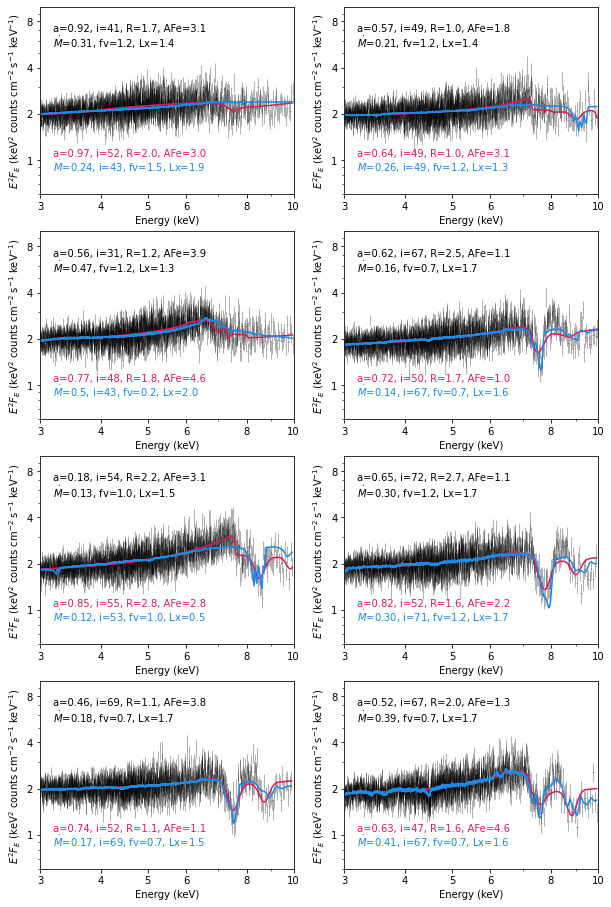

In [12]:
fig=pl.figure(figsize=(10,20),facecolor='w')
escale=2
fscale=1000

for j,fname in enumerate(testfiles["filename"]):
    ax=pl.subplot(520+j+1)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(3,10)
    ax.set_ylim(0.6,10)
#     ax.set_ylim(0.2,20)
    
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_formatter(ScalarFormatter())
    ax.xaxis.set_major_locator(FixedLocator([3,4,5,6,8,10]))
    ax.tick_params(which='minor',labelbottom=False)
    ax.set_xlabel('Energy (keV)')
    
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(ScalarFormatter())
    ax.yaxis.set_major_locator(FixedLocator([1,2,4,8]))
    ax.tick_params(which='minor',labelleft=False)
    ax.set_ylabel(r"$E^2 F_E$ (keV$^2$ counts cm$^{-2}$ s$^{-1}$ keV$^{-1}$)")
    
    i=fname.split('_')[1]
    
    ref_spec=pd.read_csv('simulated_spectra_2/athena_hybrid/spectrum_%s.csv' % str(i))
    dw_spec=pd.read_csv('simulated_spectra_2/athena_hybrid/spectrum_%s_dw.csv' % str(i))
    
    pl.plot(ref_spec['x'],ref_spec['model']*fscale*ref_spec['x']**escale,color=C1)
    
    
    
    a=(float((testfiles.loc[testfiles['filename']==fname]['fit_a'])))
    R=(float((testfiles.loc[testfiles['filename']==fname]['fit_h'])))
    AFe=(float((testfiles.loc[testfiles['filename']==fname]['fit_Afe'])))
    inc=(float((testfiles.loc[testfiles['filename']==fname]['fit_i_x'])))
    ref_pars='a=%s, i=%s, R=%s, AFe=%s' % (str(a)[:4], str(inc)[:2],str(R)[:3],str(AFe)[:3]) 
    ax.text(0.05,0.2,ref_pars,transform=ax.transAxes,color=C1)
    
    
    a=(float((testfiles.loc[testfiles['filename']==fname]['a'])))
    R=(float((testfiles.loc[testfiles['filename']==fname]['R'])))
    AFe=(float((testfiles.loc[testfiles['filename']==fname]['Afe'])))
    inc=(float((testfiles.loc[testfiles['filename']==fname]['i_x'])))
    ref_pars=r'a=%s, i=%s, R=%s, AFe=%s' % (str(a)[:4], str(inc)[:2],str(R)[:3],str(AFe)[:3]) 
    ax.text(0.05,0.87,ref_pars,transform=ax.transAxes,color='k')
    
    
    pl.plot(dw_spec['x'],dw_spec['model']*fscale*dw_spec['x']**escale,color=C2)
    
    
    mdot=(float((testfiles.loc[testfiles['filename']==fname]['fit_mdot'])))
    fv=(float((testfiles.loc[testfiles['filename']==fname]['fit_fv'])))
    Lx=(float((testfiles.loc[testfiles['filename']==fname]['fit_lx'])))
    inc=(float((testfiles.loc[testfiles['filename']==fname]['fit_i_y'])))
    dw_pars=r'$\dot{M}$=%s, i=%s, fv=%s, Lx=%s' % (str(mdot)[:4], str(inc)[:2],str(fv)[:3],str(Lx)[:3])
    ax.text(0.05,0.12,dw_pars,transform=ax.transAxes,color=C2)
    # calc chi2s:
#     ref_chi2=np.sum((ref_spec["y"]-ref_spec["model"])**2/ref_spec['yerr']**2)
#     dw_chi2=np.sum((dw_spec["y"]-dw_spec["model"])**2/dw_spec['yerr']**2)
#     print(ref_chi2,dw_chi2)
    
    mdot=(float((testfiles.loc[testfiles['filename']==fname]['mdot'])))
    fv=(float((testfiles.loc[testfiles['filename']==fname]['fv'])))
    Lx=(float((testfiles.loc[testfiles['filename']==fname]['lx'])))
    dw_pars=r'$\dot{M}$=%s, fv=%s, Lx=%s' % (str(mdot)[:4], str(fv)[:3],str(Lx)[:3])
    ax.text(0.05,0.78,dw_pars,transform=ax.transAxes,color='k')
    
    pl.errorbar(ref_spec['x'],\
                ref_spec['y']*fscale*ref_spec['x']**escale,\
                ref_spec['yerr']*fscale*ref_spec['x']**escale,\
                ref_spec['xerr'],\
                ls='none',color='k',lw=1,alpha=0.3)
    
    
pl.savefig('figures/spectra/modelcomparison_spectra_athena.pdf',bbox_inches='tight')
pl.savefig('figures/spectra/modelcomparison_spectra_athena.png',bbox_inches='tight',dpi=500)
    